Concrete Compressive Strength Prediction using DL Auto Keras(Auto ML)

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 

In [2]:
df = pd.read_csv("concrete_data.csv")
df.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [3]:
df.shape

(1030, 9)

## Data Analysis

In [4]:
df.describe()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         1030 non-null   float64
 1   blast_furnace_slag             1030 non-null   float64
 2   fly_ash                        1030 non-null   float64
 3   water                          1030 non-null   float64
 4   superplasticizer               1030 non-null   float64
 5   coarse_aggregate               1030 non-null   float64
 6   fine_aggregate                 1030 non-null   float64
 7   age                            1030 non-null   int64  
 8   concrete_compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [5]:
df.isna().sum()

cement                           0
blast_furnace_slag               0
fly_ash                          0
water                            0
superplasticizer                 0
coarse_aggregate                 0
fine_aggregate                   0
age                              0
concrete_compressive_strength    0
dtype: int64

### Heatmap

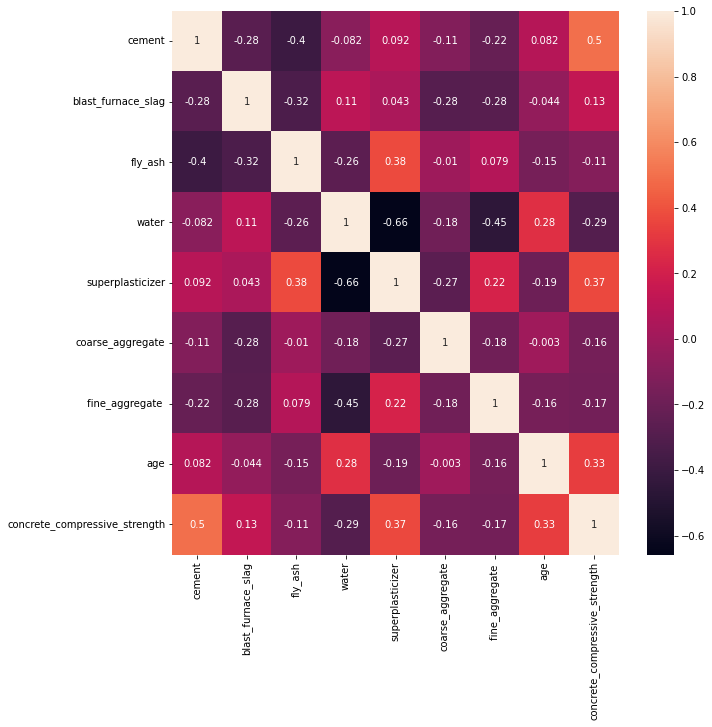

In [7]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

### Feature Engineering

In [15]:
df.columns

Index(['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer',
       'coarse_aggregate', 'fine_aggregate ', 'age',
       'concrete_compressive_strength'],
      dtype='object')

In [16]:
df.drop(["blast_furnace_slag"],axis=1,inplace=True)
df.drop(["coarse_aggregate"],axis=1,inplace=True)
df.drop(["fine_aggregate "],axis=1,inplace=True)

In [17]:
df.columns

Index(['cement', 'fly_ash', 'water', 'superplasticizer', 'age',
       'concrete_compressive_strength'],
      dtype='object')

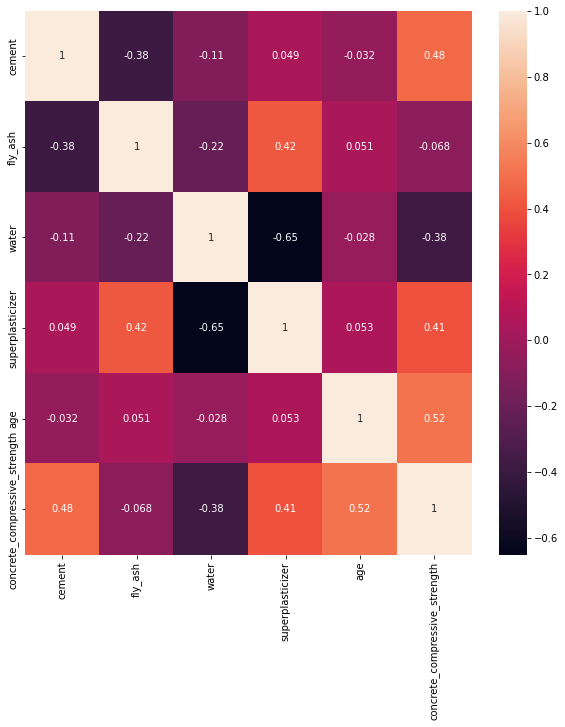

In [18]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

### Splitting the Data

In [19]:
x=df.drop(["concrete_compressive_strength"],axis=1)
y=df["concrete_compressive_strength"]

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [22]:
x_train.shape

(666, 5)

## Model Building using DL

### We will be using Keras Sequential Model for this project

In [23]:
from tensorflow.keras import models,layers

In [24]:
model=models.Sequential()
model.add(layers.Dropout(0.1))
model.add(layers.Dense(100,activation='relu',input_shape=(x_train.iloc[1].shape)))
model.add(layers.Dropout(0.7))
model.add(layers.Dense(5,activation='tanh'))
model.add(layers.Dropout(0.2))

model.add(layers.Dense(1))
model.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])

In [25]:
model.fit(x_train,y_train,epochs=100,batch_size=1,validation_data=(x_test,y_test))

Epoch 1/100
666/666 [==============================] - 2s 2ms/step - loss: 1465.3857 - mae: 34.2733 - val_loss: 1274.5288 - val_mae: 31.5716
Epoch 2/100
666/666 [==============================] - 1s 2ms/step - loss: 1311.2672 - mae: 31.9041 - val_loss: 1131.0123 - val_mae: 29.2494
Epoch 3/100
666/666 [==============================] - 1s 2ms/step - loss: 1140.0209 - mae: 29.1491 - val_loss: 981.4296 - val_mae: 26.6102
Epoch 4/100
666/666 [==============================] - 1s 2ms/step - loss: 980.3395 - mae: 26.4832 - val_loss: 842.0603 - val_mae: 23.9428
Epoch 5/100
666/666 [==============================] - 1s 2ms/step - loss: 846.9462 - mae: 23.9956 - val_loss: 720.0417 - val_mae: 21.5625
Epoch 6/100
666/666 [==============================] - 1s 2ms/step - loss: 715.0351 - mae: 21.6053 - val_loss: 617.0096 - val_mae: 19.6508
Epoch 7/100
666/666 [==============================] - 1s 2ms/step - loss: 623.7213 - mae: 20.1184 - val_loss: 532.2954 - val_mae: 18.0118
Epoch 8/100
666/666 [=

In [26]:
model.evaluate(x_test,y_test)

9/9 [==============================] - 0s 3ms/step - loss: 276.6449 - mae: 13.1455


[276.6449279785156, 13.14547061920166]

In [27]:
pred=model.predict(x_test)
pred[4]

array([34.077644], dtype=float32)

## Using Auto Keras

 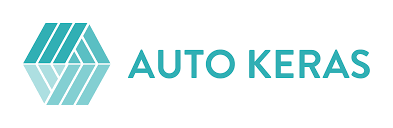

## AutoKeras: An AutoML system based on Keras. It is developed by DATA Lab at Texas A&M University

## Installing Auto Keras

In [28]:
!pip install git+https://github.com/keras-team/keras-tuner.git@1.0.2rc1


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/keras-team/keras-tuner.git (to revision 1.0.2rc1) to /tmp/pip-req-build-tbcg48z5
  Running command git clone -q https://github.com/keras-team/keras-tuner.git /tmp/pip-req-build-tbcg48z5
  Running command git checkout -q 0fb69434a132093518e0e53d40020145ae192629
  Created wheel for keras-tuner: filename=keras_tuner-1.0.2rc1-py3-none-any.whl size=85445 sha256=1c7bd66252fe396f6a8670a474a3d75bd32aeaf62723d97820d19c8fc10613cf
  Stored in directory: /tmp/pip-ephem-wheel-cache-irv6ehkp/wheels/44/e5/92/e83049ca00432aec622a4fa0200e254d88aefae9d74aa86941
Successfully built keras-tuner


In [29]:
!pip install autokeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 162 kB 7.2 MB/s 
     |████████████████████████████████| 133 kB 47.2 MB/s 
  Attempting uninstall: keras-tuner
    Found existing installation: keras-tuner 1.0.2rc1
    Uninstalling keras-tuner-1.0.2rc1:
      Successfully uninstalled keras-tuner-1.0.2rc1


In [30]:
!pip show autokeras

Name: autokeras
Version: 1.0.19
Summary: AutoML for deep learning
Home-page: http://autokeras.com
Author: DATA Lab, Keras Team
Author-email: jhfjhfj1@gmail.com
License: Apache License 2.0
Location: /usr/local/lib/python3.7/dist-packages
Requires: pandas, keras-tuner, tensorflow, packaging
Required-by: 


In [31]:
import numpy as np
import pandas as pd
import tensorflow as tf


import autokeras as ak

In [32]:
reg = ak.StructuredDataRegressor(
    overwrite=True, max_trials=3
)

In [33]:
reg.fit(x=x_train, y=y_train, verbose=0)

INFO:tensorflow:Oracle triggered exit
21/21 [==============================] - 1s 2ms/step - loss: 1478.7209 - mean_squared_error: 1478.7209
INFO:tensorflow:Assets written to: ./structured_data_regressor/best_model/assets


In [34]:
# evaluate the model
mae, _  = reg.evaluate(x_test, y_test, verbose=0)
#print('MAE: %.3f' % mae)
# use the model to make a prediction
yhat_test = reg.predict(x_test)

# get the best performing model
model = reg.export_model()


9/9 [==============================] - 0s 2ms/step


In [35]:
# summarize the loaded model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 5)]               0         
                                                                 
 multi_category_encoding (Mu  (None, 5)                0         
 ltiCategoryEncoding)                                            
                                                                 
 normalization (Normalizatio  (None, 5)                11        
 n)                                                              
                                                                 
 dense (Dense)               (None, 32)                192       
                                                                 
 re_lu (ReLU)                (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 128)               4224  

In [36]:
yhat_test

array([[2.1375387 ],
       [2.282432  ],
       [1.158879  ],
       [1.0647535 ],
       [1.0235852 ],
       [1.3973529 ],
       [1.0421253 ],
       [0.89949465],
       [1.1585371 ],
       [2.4626539 ],
       [1.30272   ],
       [0.9363172 ],
       [1.1910667 ],
       [1.8746781 ],
       [2.2008467 ],
       [0.7776661 ],
       [2.8649127 ],
       [1.236437  ],
       [1.3043046 ],
       [2.4086308 ],
       [1.5625911 ],
       [0.8930706 ],
       [1.7880008 ],
       [1.5351338 ],
       [0.91038674],
       [1.8971698 ],
       [2.0518785 ],
       [2.0602195 ],
       [2.2439208 ],
       [1.5329614 ],
       [1.1559428 ],
       [1.8755887 ],
       [2.490258  ],
       [2.1064954 ],
       [1.0494444 ],
       [2.2948139 ],
       [1.8588916 ],
       [2.1422236 ],
       [1.9182255 ],
       [1.0538099 ],
       [1.5312513 ],
       [1.0473812 ],
       [2.0351088 ],
       [1.0313592 ],
       [1.4339092 ],
       [2.456085  ],
       [1.5566375 ],
       [0.723

In [37]:
y_test

248    44.30
469    44.28
757    18.13
826    24.39
557    17.24
       ...  
862    35.23
513    40.29
939    32.72
454    39.64
277    36.97
Name: concrete_compressive_strength, Length: 286, dtype: float64